<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy  as np

def gradient_descent(X, y, learning_rate, num_iters):
  """
  Performs gradient descent to find optimal weights and bias for linear regression.
  Args:
      X: A numpy array of shape (m, n) representing the training data features.
      y: A numpy array of shape (m,) representing the training data target values.
      learning_rate: The learning rate to control the step size during updates.
      num_iters: The number of iterations to perform gradient descent.
  Returns:
      A tuple containing the learned weights and bias.
  """
  # Initialize weights and bias with random values
  m, n = X.shape
  weights = np.random.rand(n)
  bias = 0
  # Loop for the number of iterations
  for i in range(num_iters):
    # Predict y values using current weights and bias
    y_predicted = np.dot(X, weights) + bias
    # Calculate the error
    error = y - y_predicted
    # Calculate gradients for weights and bias
    weights_gradient = -2/m * np.dot(X.T, error)
    bias_gradient = -2/m * np.sum(error)
    # Update weights and bias using learning rate
    weights -= learning_rate * weights_gradient
    bias -= learning_rate * bias_gradient
  return weights, bias
# Example usage
X = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([2, 4, 5])
learning_rate = 0.01
num_iters = 100
weights, bias = gradient_descent(X, y, learning_rate, num_iters)
print("Learned weights:", weights)
print("Learned bias:", bias)


Learned weights: [1.15682084 0.50931698]
Learned bias: 0.2844396854924837


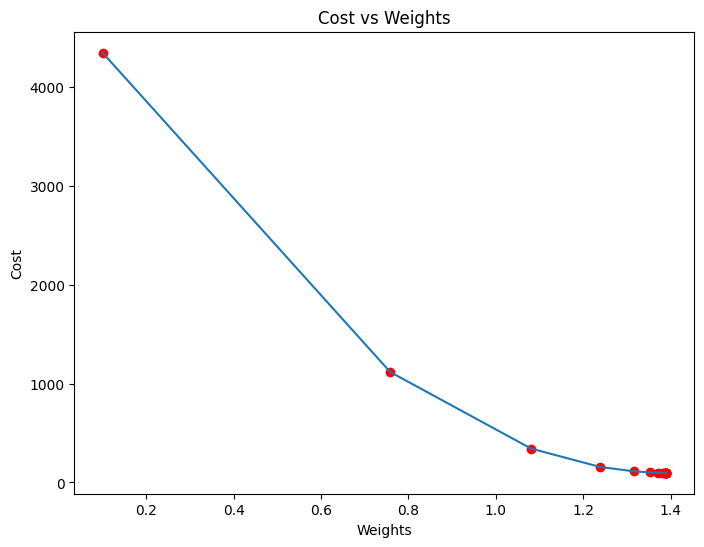

Estimated Weight: 1.3898963791228733
Estimated Bias: 0.035128737349464936


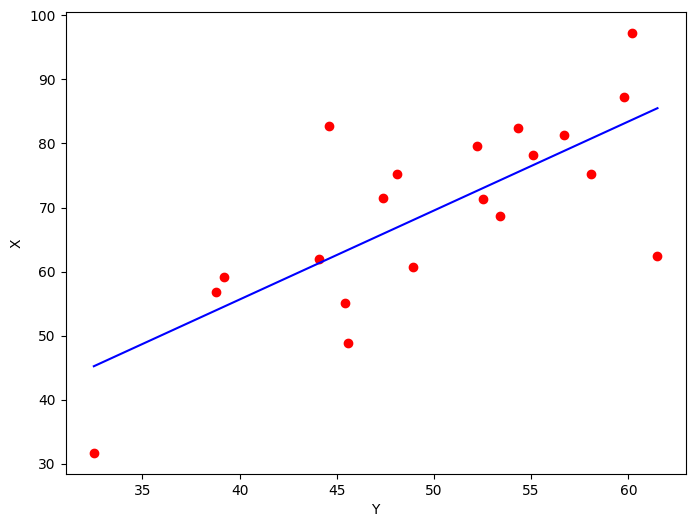

In [5]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt # Corrected import for matplotlib

def mean_squared_error(y_true, y_predicted):

   # Calculating the loss or cost
   cost = np.sum((y_true-y_predicted)**2) / len(y_true)
   return cost

# Gradient descent function
# Here iterations, learning rate, stopping threshold are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6): # Removed extra parenthesis, corrected typo

   #Initialzing weight, bias, learning rate, and iterations
   current_weight = 0.1 # Corrected variable name from current_rate to current_weight
   current_bias = 0.01
   iterations = iterations
   learning_rate = learning_rate
   n = float(len(x))

   costs = []
   weights = []
   previous_cost = None

   # Estimation of optimal parameters
   for i in range(iterations):

      # Making predictions
      y_predicted = (current_weight * x) + current_bias

      # Calculating the current cost
      current_cost = mean_squared_error(y, y_predicted)

      # If the change in cost is less than or equal to stopping threshold we stop the gradient descent
      if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
         break

      previous_cost = current_cost

      costs.append(current_cost)
      weights.append(current_weight)

      # Calculating the gradients
      weight_derivative = -(2/n) * sum(x * (y-y_predicted))
      bias_derivative = -(2/n) * sum(y-y_predicted)

      # Updating weights and bias
      current_weight = current_weight - (learning_rate * weight_derivative)
      current_bias = current_bias - (learning_rate * bias_derivative)

      # Printing the parameters for each 1000th iteration
      if (i + 1) % 100 == 0: # Added a condition to print less frequently for better readability
          print(f"Iteration {i+1}: Cost {current_cost:.4f}, Weight {current_weight:.4f}, Bias {current_bias:.4f}")

   # Visualizing the weights and cost for all iterations
   plt.figure(figsize = (8,6)) # Corrected figsize assignment
   plt.plot(weights, costs) # Corrected to use 'costs' list
   plt.scatter(weights, costs, marker = 'o', color = 'red') # Corrected to use 'costs' list
   plt.title("Cost vs Weights")
   plt.ylabel("Cost")
   plt.xlabel("Weights")
   plt.show()

   return current_weight, current_bias

def main(): # Added parenthesis for function definition

   # Data
   X = np.array([32.5, 53.4, 61.5, 47.4, 59.8,
   55.1, 52.2, 39.2, 48.1, 52.5,
   45.4, 54.3, 44.1, 58.1, 56.7,
   48.9, 44.6, 60.2, 45.6, 38.8]) # Enclosed numbers in a list
   Y = np.array([31.7, 68.7, 62.5, 71.5, 87.2,
   78.2, 79.6, 59.1, 75.3, 71.3,
   55.1, 82.4, 62.0, 75.3, 81.4,
   60.7, 82.8, 97.3, 48.8, 56.8]) # Enclosed numbers in a list

   # Estimating weight and bias using gradient descent
   estimated_weight, estimated_bias = gradient_descent(X, Y, iterations = 2000)
   print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}") # Corrected f-string variable access

   # Making predictions using estimated parameters
   Y_pred = estimated_weight * X + estimated_bias # Corrected arithmetic operation

   #Plotting the regression line
   plt.figure(figsize = (8,6)) # Corrected figsize tuple
   plt.scatter(X, Y, marker = 'o', color = 'red')
   plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color = 'blue')
   plt.ylabel("X")
   plt.xlabel("Y")
   plt.show()

if __name__=="__main__":
   main()
